<a href="https://colab.research.google.com/github/TOM-BOHN/MsDS-customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

#Background

## Context

I spent 7 years working at Salesforce, one of the largest software as a service (SaaS) companies that sells its cloud software on a subscription basesd business model. Several of those years were spent in data vizualization and business analyst roles working with the renewals organization to build and develop data science models focused on customer health and understand the risk of customers leaving the business.

The main driving focus of these projects was to understand the customer and focus on reducing the chances of a customers leaving the subscription based model.  This resulted in a relentless focus on a single KPI, customer attrition (aka customer churn).

In this report, I will play the role of the data science.  Stepping out of my business facing role and working with a similar model that was created to predict customer attrition. While I cannot use propriatary business data for this analysis, I will find and use an publicly availible customer chrun dataset to emulate a similar customer context. I will also use the XGBoosted package that was implemented to create the predicition model.

## Primer on Customer Attrition

## Problem Type and Model

## Dataset Selection

## Objective

# Import Required Libraries

In [ ]:
#
import os
#
import pandas as pd
import numpy as np
import math
#
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Data

## Dataset Source

Attribute                 |Details
:-------------------------|:-----------------------------
**Dataset:**              | Telco Customer Churn (11.1.3+)
**Source Type:**         | Public Dataset
**Source Link:**          | https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113
**Source Documentation:** | https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

###About Dataset Provider

The datasource used in this analysis was created by the Sample Team at IBM as part of the the IBM Accelerator Catalog, a free platform created to showcase assets and demonstrate the capabilities of the IBM products. This dataset comses from a subset of this platform focused on IBM Cognos Analytics Sample Data. The datset was package on the Kaggle website and is availible for download through the UI or the Kaggle API.

###About Dataset

Specifically, the **Telco Customer Churn (11.1.3+)** data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index. [2]

## Dataset Details

### Dataset Tables
The dataset is comprised of 5 tables, focused on specific details related to the customer.  The tables are:
- **Demographics** : The **person** conceptual entity including demographic details related to each customers included in the dataset.
- **Location** : The **location** conceptual entity, including location information related to where the customer is located in the world. A less grnular form of address information.
- **Population** : Additional statisticss related to the location entity, including the population of each zipcode included in the dataset.
- **Services** : The **transaction** entity in a summerized format, outlining the services / prducts consumed, actions taken by the customer, and transaction / billing details related to the customers purchase.
- **Status** : Additional derived statistics related to the person entity, including survey details, derived scores, and churn information related to each customer.

### Dataset Relationships

The **Services** table is the main fact in the data model.

The following relationships can be used to join the data:
- **Services** joined to **Demographics** joined on CustomerID = CustomerID
- **Services** joined to **Status** joined on CustomerID = CustomerID
- **Demographics** joined to **Location** joined on CustomerID = CustomerID
- **Location** joined to **Population** joined on ZipCode = ZipCode

## Dataset Dictionary

Datails on each field in the original dataset can be found in the following data dictionary.

###Demographics
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Gender**: The customer's gender: Male, Female
- **Age**: The customer's current age, in years, at the time the fiscal quarter ended.
- **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No
- **Married**: Indicates if the customer is married: Yes, No
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- **Number of Dependents**: Indicates the number of dependents that live with the customer.

### Location
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Country**: The country of the customer's primary residence.
- **State**: The state of the customer's primary residence.
- **City**: The city of the customer's primary residence.
- **Zip Code**: The zip code of the customer's primary residence.
- **Lat Long**: The combined latitude and longitude of the customer's primary residence.
- **Latitude**: The latitude of the customer's primary residence.
- **Longitude**: The longitude of the customer's primary residence.

###Population
- **ID**: A unique ID that identifies each row.
- **Zip Code**: The zip code of the customer's primary residence.
- **Population**: A current population estimate for the entire Zip Code area.

###Services
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Referred a Friend**: Indicates if the customer has ever referred a friend or family member to this company: Yes, No
- **Number of Referrals**: Indicates the number of referrals to date that the customer has made.
- **Tenure in Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- **Offer**: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.
- **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No
- **Avg Monthly Long Distance Charges**: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- **Avg Monthly GB Download**: Indicates the customer's average download volume in gigabytes, calculated to the end of the quarter specified above.
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- **Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- **Premium Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- **Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Streaming Music**: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- **Unlimited Data**: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No
- **Contract**: Indicates the customer's current contract type: Month-to-Month, One Year, Two Year.
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No
- **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- **Monthly Charge**: Indicates the customer's current total monthly charge for all their services from the company.
- **Total Charges**: Indicates the customer's total charges, calculated to the end of the quarter specified above.
- **Total Refunds**: Indicates the customer's total refunds, calculated to the end of the quarter specified above.
- **Total Extra Data Charges**: Indicates the customer's total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.
- **Total Long Distance Charges**: Indicates the customer's total charges for long distance above those specified in their plan, by the end of the quarter specified above.

### Status
- **CustomerID**: A unique ID that identifies each customer.
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- **Quarter**: The fiscal quarter that the data has been derived from (e.g. Q3).
- **Satisfaction Score**: A customer's overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).
- **Satisfaction Score Label**: Indicates the text version of the score (1-5) as a text string.
- **Customer Status**: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined
- **Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- **Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- **Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- **Churn Score Category**: A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100
- **CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- **CLTV Category**: A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.
- **Churn Category**: A high-level category for the customer's reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.
- **Churn Reason**: A customer's specific reason for leaving the company. Directly related to Churn Category.

## Import Dataset to Notebook

### Connect to Kaggle API

In [ ]:
#Prepare to Connect to Kaggle API with Token

#Create a Kaggle API Token
#- Log into your kaggle account, navigate to theAPI section
#- Create a New API Token, triggering the downloaf of the kaggle.json file
#- Go to this Google Colab Notebook step and proceed

#Mount the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

#from google.colab import files
#files.upload()
#prompt open to upload kaggle.json

source_filepath = '/content/gdrive/MyDrive/Colab_files/kaggle.json'
destination_filepath = '/content'
!cp {source_filepath} {destination_filepath}

#Verify the kaggle.json file is present
!ls -lha kaggle.json

#Install kaggle API
!pip install -q kaggle

#Move kaggle.json file to the appropriate directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

#check the directory before downloading the datasets
!pwd

#Sanity Check for Connection
!kaggle datasets list

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-rw------- 1 root root 66 Aug  9 20:48 kaggle.json
/content
ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           9528        364  1.0              
juhibhojani/house-price                                     House Price                                        7MB  2023-08-02 16:51:21           1153         43  0.9411765        
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset 

### Import Dataset from Kaggle

In [ ]:
#Import the Kaggle Data Source

#Define the source of the dataset
kaggle_owner_name = 'ylchang'
kaggle_dataset_name = 'telco-customer-churn-1113'
kaggle_dataset = kaggle_owner_name + '/' + kaggle_dataset_name
print(kaggle_dataset)

#Define the destination of the dataset
dest_path = '/content'
dest_folder = ''
dest_dataset = dest_path + dest_folder
print(dest_dataset)

#Download the kaggle dataset
!kaggle datasets download -d {kaggle_dataset} -p {dest_dataset}

#Unzip the files
zip_file_name = kaggle_dataset_name + '.zip'
!mkdir {kaggle_dataset_name}
print(zip_file_name)
!unzip -o {zip_file_name} -d {kaggle_dataset_name}

ylchang/telco-customer-churn-1113
/content
telco-customer-churn-1113.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘telco-customer-churn-1113’: File exists
telco-customer-churn-1113.zip
Archive:  telco-customer-churn-1113.zip
  inflating: telco-customer-churn-1113/Telco_customer_churn.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_demographics.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_location.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_population.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_services.xlsx  
  inflating: telco-customer-churn-1113/Telco_customer_churn_status.xlsx  


Reference for Connecting to Kaggle

*   Steps to download Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/156610
*   Easy way to use Kaggle datasets in Google Colab: https://www.kaggle.com/discussions/general/51898
*   Easiest way to download kaggle data in Google Colab: https://www.kaggle.com/discussions/general/74235

## Pre-Processing

#### Covert Files to Dataframes

In [ ]:
import os

#Get the list of files imported
directory_path = dest_dataset + '/' + kaggle_dataset_name
directory_files = os.listdir(directory_path)
print(directory_files)

['Telco_customer_churn_population.xlsx', 'Telco_customer_churn_location.xlsx', 'Telco_customer_churn_services.xlsx', 'Telco_customer_churn.xlsx', 'Telco_customer_churn_status.xlsx', 'Telco_customer_churn_demographics.xlsx']


In [ ]:
# Create a dictonary to store the datafames imported
df_dict = {}

for file in directory_files:
  dataset_file = dest_dataset + '/' + kaggle_dataset_name + '/' + file
  df_dict[file] = pd.read_excel(dataset_file)
  print("key: ", file)
  #print(df_dict[file], "\n")

key:  Telco_customer_churn_population.xlsx
key:  Telco_customer_churn_location.xlsx
key:  Telco_customer_churn_services.xlsx
key:  Telco_customer_churn.xlsx
key:  Telco_customer_churn_status.xlsx
key:  Telco_customer_churn_demographics.xlsx


#### Initial Descriptive Details of Tables

In [ ]:
def quick_table_details (df_name, df, level_of_detail = 10):
  if level_of_detail >= 1:
    print('\n####', df_name, '####')
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    print('number of features (columns) = ' + str(num_cols))
    print('number of observations (rows) = ' + str(num_rows))
    print('----------------------------')
  if level_of_detail >= 2:
    print(df.dtypes.value_counts())
    print('----------------------------')
  if level_of_detail >= 3:
    print(df.columns)
    print('----------------------------')
  #if level_of_detail >= 4:
    #print(df.count)
    #print(df.max)
    #print(df.min)
    #print(df.shape)
    #print(df.describe)

for df_name, df in df_dict.items():
  quick_table_details(df_name, df)


#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 3
number of observations (rows) = 1671
----------------------------
int64    3
dtype: int64
----------------------------
Index(['ID', 'Zip Code', 'Population'], dtype='object')
----------------------------

#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object     5
int64      2
float64    2
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude'],
      dtype='object')
----------------------------

#### Telco_customer_churn_services.xlsx ####
number of features (columns) = 30
number of observations (rows) = 7043
----------------------------
object     19
float64     6
int64       5
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals',

####Drop Unneccisary Fields

In [ ]:
df_name = 'Telco_customer_churn_population.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['ID'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')



#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 3
number of observations (rows) = 1671
----------------------------
int64    3
dtype: int64
----------------------------
Index(['ID', 'Zip Code', 'Population'], dtype='object')
----------------------------

#### Telco_customer_churn_population.xlsx ####
number of features (columns) = 2
number of observations (rows) = 1671
----------------------------
int64    2
dtype: int64
----------------------------


,Zip Code,Population
count,1671.000000,1671.000000
mean,93678.992220,20276.384201
std,1817.763591,20689.117300
min,90001.000000,11.000000
25%,92269.000000,1789.000000
50%,93664.000000,14239.000000
75%,95408.000000,32942.500000
max,96161.000000,105285.000000


In [ ]:
df_name = 'Telco_customer_churn_location.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count', 'Lat Long', 'Latitude', 'Longitude'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object     5
int64      2
float64    2
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude'],
      dtype='object')
----------------------------

#### Telco_customer_churn_location.xlsx ####
number of features (columns) = 5
number of observations (rows) = 7043
----------------------------
object    4
int64     1
dtype: int64
----------------------------


,Customer ID,Country,State,City,Zip Code
count,7043,7043,7043,7043,7043.000000
unique,7043,1,1,1106,NaN
top,8779-QRDMV,United States,California,Los Angeles,NaN
freq,1,7043,7043,293,NaN
mean,NaN,NaN,NaN,NaN,93486.070567
std,NaN,NaN,NaN,NaN,1856.767505
min,NaN,NaN,NaN,NaN,90001.000000
25%,NaN,NaN,NaN,NaN,92101.000000
50%,NaN,NaN,NaN,NaN,93518.000000
75%,NaN,NaN,NaN,NaN,95329.000000


In [ ]:
df_name = 'Telco_customer_churn_demographics.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_demographics.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object    6
int64     3
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents'],
      dtype='object')
----------------------------

#### Telco_customer_churn_demographics.xlsx ####
number of features (columns) = 8
number of observations (rows) = 7043
----------------------------
object    6
int64     2
dtype: int64
----------------------------


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
count,7043,7043,7043.000000,7043,7043,7043,7043,7043.000000
unique,7043,2,NaN,2,2,2,2,NaN
top,8779-QRDMV,Male,NaN,No,No,No,No,NaN
freq,1,3555,NaN,5642,5901,3641,5416,NaN
mean,NaN,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692
std,NaN,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802
min,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000


In [ ]:
df_name = 'Telco_customer_churn_services.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count', 'Quarter'], axis=1)
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_services.xlsx ####
number of features (columns) = 30
number of observations (rows) = 7043
----------------------------
object     19
float64     6
int64       5
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
----------------------------

#### Telco_customer_churn_services.xlsx ####
number of features (

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043,7043,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,2,NaN,NaN,6,2,NaN,2,2,4,...,2,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,8779-QRDMV,No,NaN,NaN,None,Yes,NaN,No,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3821,NaN,NaN,3877,6361,NaN,4072,5517,3035,...,4745,3610,4171,3909,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.951867,32.386767,NaN,NaN,22.958954,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,NaN,NaN,3.001199,24.542061,NaN,NaN,15.448113,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,NaN,NaN,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,NaN,NaN,0.000000,9.000000,NaN,NaN,9.210000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,NaN,NaN,0.000000,29.000000,NaN,NaN,22.890000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,NaN,NaN,3.000000,55.000000,NaN,NaN,36.395000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000


In [ ]:
df_name = 'Telco_customer_churn_status.xlsx'
quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
df_dict[df_name] = df_dict[df_name].drop(['Count', 'Quarter'], axis=1)
# Display a summary of table statistics
quick_table_details(df_name, df_dict[df_name],2)
df_dict[df_name].describe(include='all')


#### Telco_customer_churn_status.xlsx ####
number of features (columns) = 11
number of observations (rows) = 7043
----------------------------
object    6
int64     5
dtype: int64
----------------------------
Index(['Customer ID', 'Count', 'Quarter', 'Satisfaction Score',
       'Customer Status', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Category', 'Churn Reason'],
      dtype='object')
----------------------------

#### Telco_customer_churn_status.xlsx ####
number of features (columns) = 9
number of observations (rows) = 7043
----------------------------
object    5
int64     4
dtype: int64
----------------------------


,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
count,7043,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,1869,1869
unique,7043,NaN,3,2,NaN,NaN,NaN,5,20
top,8779-QRDMV,NaN,Stayed,No,NaN,NaN,NaN,Competitor,Competitor had better devices
freq,1,NaN,4720,5174,NaN,NaN,NaN,841,313
mean,NaN,3.244924,NaN,NaN,0.265370,58.505040,4400.295755,NaN,NaN
std,NaN,1.201657,NaN,NaN,0.441561,21.170031,1183.057152,NaN,NaN
min,NaN,1.000000,NaN,NaN,0.000000,5.000000,2003.000000,NaN,NaN
25%,NaN,3.000000,NaN,NaN,0.000000,40.000000,3469.000000,NaN,NaN
50%,NaN,3.000000,NaN,NaN,0.000000,61.000000,4527.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN,1.000000,75.500000,5380.500000,NaN,NaN


In [ ]:
#df_name = 'Telco_customer_churn.xlsx'
#quick_table_details(df_name, df_dict[df_name])
#Drop fields not useful to the predictive model
#df_dict[df_name] = df_dict[df_name].drop(['Count', 'Lat Long', 'Latitude', 'Longitude'], axis=1)
#Drop fields duplicated in other tables
#df_dict[df_name] = df_dict[df_name].drop(['Tenure in Months'], axis=1)
#quick_table_details(df_name, df_dict[df_name],2)
#df_dict[df_name].describe(include='all')

#### Join and Drop Keys

In [ ]:
df_s = pd.DataFrame(df_dict['Telco_customer_churn_demographics.xlsx'])
df_s = df_s.merge(df_dict['Telco_customer_churn_location.xlsx'], how='left', on='Customer ID')
df_s = df_s.merge(df_dict['Telco_customer_churn_population.xlsx'], how='left', on='Zip Code')
df_s = df_s.merge(df_dict['Telco_customer_churn_services.xlsx'], how='left', on='Customer ID')
df_s = df_s.merge(df_dict['Telco_customer_churn_status.xlsx'], how='left', on='Customer ID')
df_s

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,1639.44,3039.53,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,865.20,2807.47,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,2135.52,9453.04,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0.00,319.21,4,Stayed,No,0,59,2793,NaN,NaN


## Summary of Data

### Input Data Descriptive Statistics

In [ ]:
quick_table_details('df_s', df_s)
df_s.describe(include='all')


#### df_s ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
object     30
int64      12
float64     6
dtype: int64
----------------------------
Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Sat

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
count,7043,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,...,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,1869,1869
unique,7043,2,NaN,2,2,2,2,NaN,1,1,...,NaN,NaN,NaN,3,2,NaN,NaN,NaN,5,20
top,8779-QRDMV,Male,NaN,No,No,No,No,NaN,United States,California,...,NaN,NaN,NaN,Stayed,No,NaN,NaN,NaN,Competitor,Competitor had better devices
freq,1,3555,NaN,5642,5901,3641,5416,NaN,7043,7043,...,NaN,NaN,NaN,4720,5174,NaN,NaN,NaN,841,313
mean,NaN,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692,NaN,NaN,...,749.099262,3034.379056,3.244924,NaN,NaN,0.265370,58.505040,4400.295755,NaN,NaN
std,NaN,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802,NaN,NaN,...,846.660055,2865.204542,1.201657,NaN,NaN,0.441561,21.170031,1183.057152,NaN,NaN
min,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,21.360000,1.000000,NaN,NaN,0.000000,5.000000,2003.000000,NaN,NaN
25%,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,70.545000,605.610000,3.000000,NaN,NaN,0.000000,40.000000,3469.000000,NaN,NaN
50%,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,401.440000,2108.640000,3.000000,NaN,NaN,0.000000,61.000000,4527.000000,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,1191.100000,4801.145000,4.000000,NaN,NaN,1.000000,75.500000,5380.500000,NaN,NaN


# Data Clensing

### Data Type Munging

In [ ]:
#df_s.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df_s.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,68701,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,27778,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,26265,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [ ]:
# covert to boolean fields

bool_cols = ['Under 30', 'Married', 'Senior Citizen', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
             'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
             'Streaming Music',	'Unlimited Data', 'Paperless Billing', 'Churn Label']

for elt in bool_cols:
  df_s[elt] = df_s[elt].map({'Yes':True ,'No':False,
                             'yes':True ,'no':False,
                              True:True ,False:False,})
  df_s[elt] = df_s[elt].astype('bool')


#convert_dict = {'Under 30': 'bool'
#                }
#df_s = df_s.astype(convert_dict)
#print('\n')
#print(df_s.dtypes)
#print('\n')
print('Corrected data type for', len(bool_cols), 'boolean columns.')
print('\n')
print(df_s.select_dtypes("bool").info())
print('\n')
print(df_s.select_dtypes("bool").describe(include='all'))

Corrected data type for 18 boolean columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Under 30                7043 non-null   bool 
 1   Senior Citizen          7043 non-null   bool 
 2   Married                 7043 non-null   bool 
 3   Dependents              7043 non-null   bool 
 4   Referred a Friend       7043 non-null   bool 
 5   Phone Service           7043 non-null   bool 
 6   Multiple Lines          7043 non-null   bool 
 7   Internet Service        7043 non-null   bool 
 8   Online Security         7043 non-null   bool 
 9   Online Backup           7043 non-null   bool 
 10  Device Protection Plan  7043 non-null   bool 
 11  Premium Tech Support    7043 non-null   bool 
 12  Streaming TV            7043 non-null   bool 
 13  Streaming Movies        7043 non-null   bool 
 14  Streaming Music         70

In [ ]:
print(df_s.select_dtypes('int64').columns)
print(df_s.select_dtypes('float64').columns)

Index(['Age', 'Number of Dependents', 'Zip Code', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly GB Download', 'Total Extra Data Charges', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV'], dtype='object')
Index(['Avg Monthly Long Distance Charges', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Long Distance Charges', 'Total Revenue'], dtype='object')


In [ ]:
str_cols = ['Customer ID']
int_cols = ['CLTV', 'Churn Value', 'Number of Referrals', 'Avg Monthly GB Download', 'Satisfaction Score', 'Tenure in Months', 'Age', 'Number of Dependents', 'Population', 'Churn Score']
float_cols = ['Total Revenue', 'Monthly Charge', 'Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Long Distance Charges', 'Total Charges', 'Total Extra Data Charges']

for elt in str_cols:
  df_s[elt] = df_s[elt].astype('object')

for elt in int_cols:
  df_s[elt] = df_s[elt].astype('int64')

for elt in float_cols:
  df_s[elt] = df_s[elt].astype('float64')

In [ ]:
all_cols = df_s.columns
remaining_cols = list(set(all_cols) - set(bool_cols) - set(str_cols) - set(int_cols) - set(float_cols))

print('There are ', len(remaining_cols), 'columns to still map.')
print(remaining_cols)
print('\n')
print(df_s.dtypes[remaining_cols])

There are  12 columns to still map.
['Contract', 'City', 'Gender', 'Customer Status', 'Churn Category', 'Internet Type', 'Country', 'State', 'Payment Method', 'Offer', 'Churn Reason', 'Zip Code']


Contract           object
City               object
Gender             object
Customer Status    object
Churn Category     object
Internet Type      object
Country            object
State              object
Payment Method     object
Offer              object
Churn Reason       object
Zip Code            int64
dtype: object


In [ ]:
# covert to categorical fields

cat_list = ['Offer', 'Gender', 'Internet Type', 'Contract', 'Payment Method', 'State', 'Country', 'Churn Reason', 'City', 'Customer Status', 'Churn Category', 'Zip Code']

print(df_s.select_dtypes("object").describe(include='all'))

for elt in cat_list:
  df_s[elt] = df_s[elt].astype('category')

print('\n')
print('Corrected data type for', len(cat_list), 'category columns.')
print('\n')
print(df_s.select_dtypes('category').info())
print('\n')
print(df_s.select_dtypes('category').describe(include='all'))

       Customer ID Gender        Country       State         City Offer Internet Type        Contract   Payment Method Customer Status Churn Category                   Churn Reason
count         7043   7043           7043        7043         7043  7043          7043            7043             7043            7043           1869                           1869
unique        7043      2              1           1         1106     6             4               3                3               3              5                             20
top     8779-QRDMV   Male  United States  California  Los Angeles  None   Fiber Optic  Month-to-Month  Bank Withdrawal          Stayed     Competitor  Competitor had better devices
freq             1   3555           7043        7043          293  3877          3035            3610             3909            4720            841                            313


Corrected data type for 12 category columns.


<class 'pandas.core.frame.DataFrame'>
Int64Ind

In [ ]:
remaining_cols = list(set(remaining_cols) - set(cat_list))

print('There are ', len(remaining_cols), 'columns to still map.')
print(remaining_cols)
print('\n')
print(df_s.dtypes[remaining_cols])

There are  0 columns to still map.
[]


Series([], dtype: object)


In [ ]:
print('Completed update of data type for', len(df_s.columns), 'columns.')
print('-- Corrected or validated data type for', len(bool_cols), 'boolean columns.')
print('-- Corrected or validated data type for', len(cat_list), 'category columns.')
print('-- Corrected or validated data type for', len(int_cols), 'integer columns.')
print('-- Corrected or validated data type for', len(float_cols), 'float columns.')
print('-- Corrected or validated data type for', len(str_cols), 'string columns.')

print('\n')
print(df_s.info())

Completed update of data type for 48 columns.
-- Corrected or validated data type for 18 boolean columns.
-- Corrected or validated data type for 12 category columns.
-- Corrected or validated data type for 10 integer columns.
-- Corrected or validated data type for 7 float columns.
-- Corrected or validated data type for 1 string columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer ID                        7043 non-null   object  
 1   Gender                             7043 non-null   category
 2   Age                                7043 non-null   int64   
 3   Under 30                           7043 non-null   bool    
 4   Senior Citizen                     7043 non-null   bool    
 5   Married                            7043 non-null   bool    
 6   Dependents              

### Review Validity of Observations

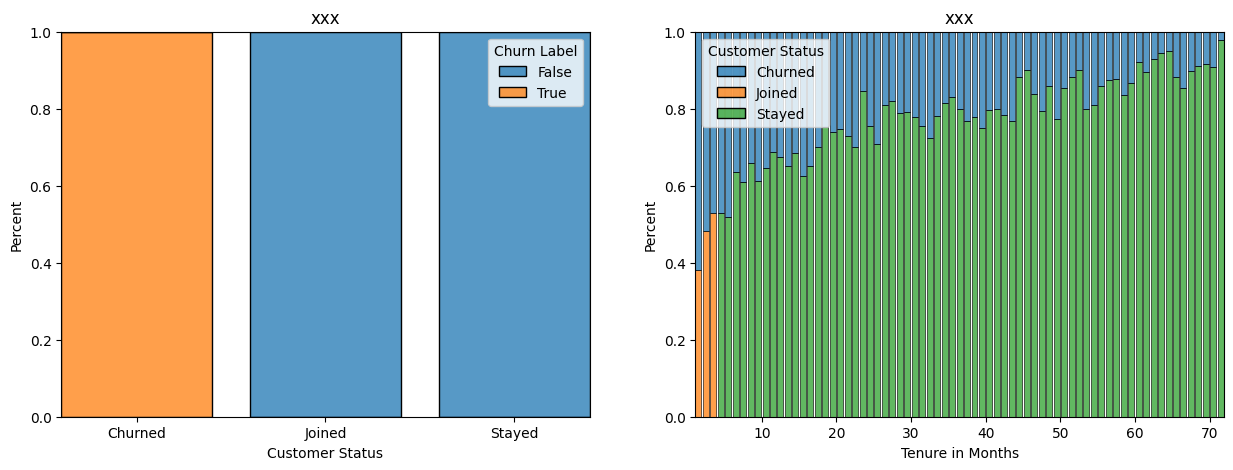

In [ ]:
#Plot the relationship between Customer Status, Tenure in Months, and Churn Label
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(15,5))

chart = sns.histplot(x = 'Customer Status', data = df_s, hue = 'Churn Label', stat='percent', multiple='fill', shrink=0.8, common_norm=True, ax=axs[0]).set(title='xxx')
chart = sns.histplot(x = 'Tenure in Months', data = df_s, hue = 'Customer Status', stat='percent', multiple='fill', shrink=0.8, common_norm=True, binwidth = 1, ax=axs[1]).set(title='xxx')

The charts indicate that a customer status of Joined must occur within the first 3 months. In the charts, we can see that no user flagged as Joined has left, however, when we use tenure to indicate new customers, it is observed that plenty of recent (within the last 3 months), customers have indeed left the company. Based on this analysis, all observations should remain in the dataset for the model. In addition, the 'Customer Status' field should be removed for two reasons. First, it overlaps with the target we are looking to predict, which means it cannot be used for the prediciton. Second, the rest of the information contained in this field (essentially an encoded bucket of 'Churn Label' and 'Tenure in Months') is already availible to the model in 'Tenure in Months'.

In [ ]:
# Drop Customer Status
quick_table_details('df_s', df_s,2)
#Drop fields with an extreamly large amount of nulls
df_s = df_s.drop(['Customer Status'], axis=1)
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)


#### df_s ####
number of features (columns) = 48
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
object       1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------

#### df_s ####
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
object       1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------


### Review Missing Values in Variables

In [ ]:
# Inspect observations (rows) with null values
df_null = df_s.isnull()
df_null['null_count'] = df_null.sum(axis=1)
df_null['null_flag'] = df_null['null_count'].apply(lambda x: 1 if x > 0 else 0)

df_null = df_null[df_null['null_count'] > 0]
print('count of observations with nulls:',df_null['null_flag'].sum())

count of observations with nulls: 5174


In [ ]:
# Identify Columns with Nulls
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nc = {}

for c in df_s.columns:
    string_null = np.array([x in a[2:] for x in df_s[c]]).sum()
    std_null = df_s[c].isnull().sum()
    ttl_null = std_null + string_null
    if ttl_null > 0:
        nc[c] = ttl_null

print('number of fields with nulls:', len(nc))
print(pd.Series(nc))

number of fields with nulls: 4
Offer             3877
Internet Type     1526
Churn Category    5174
Churn Reason      5174
dtype: int64


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        2700., 2750., 2800., 2850., 2900., 2950., 3000., 3050., 3100.,
        3150., 3200., 3250., 

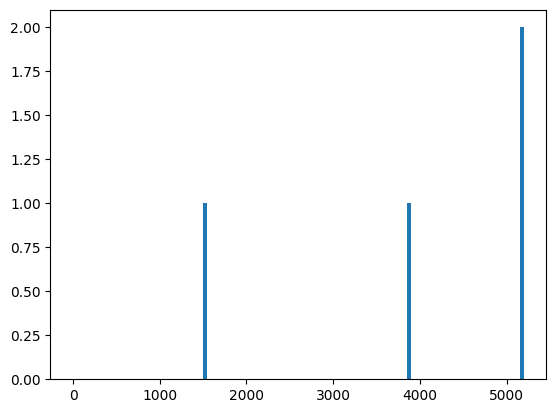

In [ ]:
# Make a histogram of null counts
null_counts=pd.Series(nc)
histogram = plt.hist(null_counts, bins = range(0,5250,50)) # replace the histogram to be the plt.hist() object.
histogram

In [ ]:
#determine how to handle nulls
total_rows = len(df_s)
print('total rows in dataset:', total_rows, '\n')
df_null_counts = pd.DataFrame(null_counts).reset_index().rename(columns={'index': 'feature', 0: 'nulls'})
df_null_counts['pct'] = df_null_counts['nulls'] / total_rows

features_to_impute = df_null_counts[df_null_counts['pct']<=0.05]['feature']
features_to_throw = df_null_counts[df_null_counts['pct']>0.05]['feature']

print('features to impute:', len(features_to_impute))
print(features_to_impute, '\n')
print('features to throw:', len(features_to_throw))
print(features_to_throw, '\n')

total rows in dataset: 7043 

features to impute: 0
Series([], Name: feature, dtype: object) 

features to throw: 4
0             Offer
1     Internet Type
2    Churn Category
3      Churn Reason
Name: feature, dtype: object 



In [ ]:
# Drop Churn Category and Churn Reason based on significant null volumes
# Keep Offer and Internet Type as it valid to have None for these items
quick_table_details('df_s', df_s,2)
#Drop fields with an extreamly large amount of nulls
df_s = df_s.drop(['Churn Category', 'Churn Reason'], axis=1)
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)


#### df_s ####
number of features (columns) = 47
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
object       1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------

#### df_s ####
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
object       1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------


### Review Categorical Variables

In [ ]:
def get_variable_lists(df):
  cat_var = list(df.select_dtypes(['object', 'boolean', 'category']).columns)
  num_var = list(df.select_dtypes(['int64', 'float64']).columns)

  return cat_var, num_var

def print_variable_lists(cat_var, num_var):
  print('There are', len(cat_var), 'categorical variables.')
  print('categorical variables =', cat_var)
  print('\n')
  print('There are', len(num_var), 'numeric variables.')
  print('numberic variables =', num_var)
  print('\n')

def print_value_summary(cat_var, num_var):
  #list unique values in categorical variables
  print('listing unique values for each categorical variable:')
  for c in cat_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has', len(unique_values), 'unique values. They are:', unique_values)
  print('\n')
  print('listing range of values for each numeric variable:')
  for c in num_var:
      unique_values = df_s[c].unique()
      print('--', c, 'has min of', min(unique_values), 'and a max of', max(unique_values))
  print('\n')

In [ ]:
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
print_value_summary(cat_var, num_var)

There are 28 categorical variables.
categorical variables = ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Zip Code', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']


There are 17 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV']


listing unique values for each categorical variable:
-- Customer ID has 7043 unique values. Th

In [ ]:
# Drop Customer ID, City, Zip Code, State, Country
quick_table_details('df_s', df_s,2)
#Drop fields with too many categories
df_s = df_s.drop(['Customer ID', 'City', 'Zip Code'], axis=1)
#Drop fields with only 1 category
df_s = df_s.drop(['State', 'Country'], axis=1)
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)


#### df_s ####
number of features (columns) = 45
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
object       1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------

#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------


### Remove Variables Related to Target

In [ ]:
quick_table_details('df_s', df_s)


#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------
Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'Population', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Label', 'Churn Value', 'Churn

In [ ]:
# Some variable relate to the churn indicator itself and thus should be excluded from the variables
# Drop 'Churn Value', 'Churn Score', 'CLTV'
quick_table_details('df_s', df_s,2)
#Drop fields with too many categories
df_s = df_s.drop(['Churn Value', 'Churn Score', 'CLTV'], axis=1)

# Display a summary of table statistics
quick_table_details('df_s', df_s,2)


#### df_s ####
number of features (columns) = 40
number of observations (rows) = 7043
----------------------------
bool        18
int64       10
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------

#### df_s ####
number of features (columns) = 37
number of observations (rows) = 7043
----------------------------
bool        18
int64        7
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------


### Summary of Data Clensing

#### Cleaned Data Descriptive Statistics

In [ ]:
# Display a summary of table statistics
quick_table_details('df_s', df_s,2)
# Display a summary of the variables
cat_var, num_var = get_variable_lists(df_s)
print_variable_lists(cat_var, num_var)
print_value_summary(cat_var, num_var)
# Finally summary statistics
df_s.describe(include='all')


#### df_s ####
number of features (columns) = 37
number of observations (rows) = 7043
----------------------------
bool        18
int64        7
float64      7
category     1
category     1
category     1
category     1
category     1
dtype: int64
----------------------------
There are 23 categorical variables.
categorical variables = ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']


There are 14 numeric variables.
numberic variables = ['Age', 'Number of Dependents', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Ex

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Label
count,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043
unique,2,NaN,2,2,2,2,NaN,NaN,2,NaN,NaN,6,2,NaN,2,2,4,NaN,2,2,2,2,2,2,2,2,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Male,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN,None,True,NaN,False,True,Fiber Optic,NaN,False,False,False,False,False,False,False,True,Month-to-Month,True,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,3555,NaN,5642,5901,3641,5416,NaN,NaN,3821,NaN,NaN,3877,6361,NaN,4072,5517,3035,NaN,5024,4614,4621,4999,4336,4311,4555,4745,3610,4171,3909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5174
mean,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692,22139.603294,NaN,1.951867,32.386767,NaN,NaN,22.958954,NaN,NaN,NaN,20.515405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,NaN
std,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802,21152.392837,NaN,3.001199,24.542061,NaN,NaN,15.448113,NaN,NaN,NaN,20.418940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,NaN
min,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000,11.000000,NaN,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,NaN
25%,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000,2344.000000,NaN,0.000000,9.000000,NaN,NaN,9.210000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,NaN
50%,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000,17554.000000,NaN,0.000000,29.000000,NaN,NaN,22.890000,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,NaN
75%,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000,36125.000000,NaN,3.000000,55.000000,NaN,NaN,36.395000,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,NaN


# Exploratory Data Analysis

## Overview of Target

## Histograms of Variables

In [ ]:
'''
fig, axes = plt.subplots(nrows = 10, ncols = 5, figsize = (20,20), sharey = True)

for v, column in enumerate(cat_var):
  # Create a chart for each column in the data source
  chart = sns.histplot(x = column, data = df_s, hue = 'Churn Label', ax=axes.flat[v], stat='percent', multiple='fill', shrink=0.8, common_norm=True).set(title=column)
  # Format the Y axis and remove the label
  chart.set_ylabel('')
  # Remove the legend for the chart
  chart.legend_.remove()


fig.suptitle('Customer Churn by Variable')
plt.show()
'''

"\nfig, axes = plt.subplots(nrows = 10, ncols = 5, figsize = (20,20), sharey = True)\n\nfor v, column in enumerate(cat_var):\n  # Create a chart for each column in the data source\n  chart = sns.histplot(x = column, data = df_s, hue = 'Churn Label', ax=axes.flat[v], stat='percent', multiple='fill', shrink=0.8, common_norm=True).set(title=column)\n  # Format the Y axis and remove the label\n  chart.set_ylabel('')\n  # Remove the legend for the chart\n  chart.legend_.remove()\n\n\nfig.suptitle('Customer Churn by Variable')\nplt.show()\n"

## Correlation Matrix

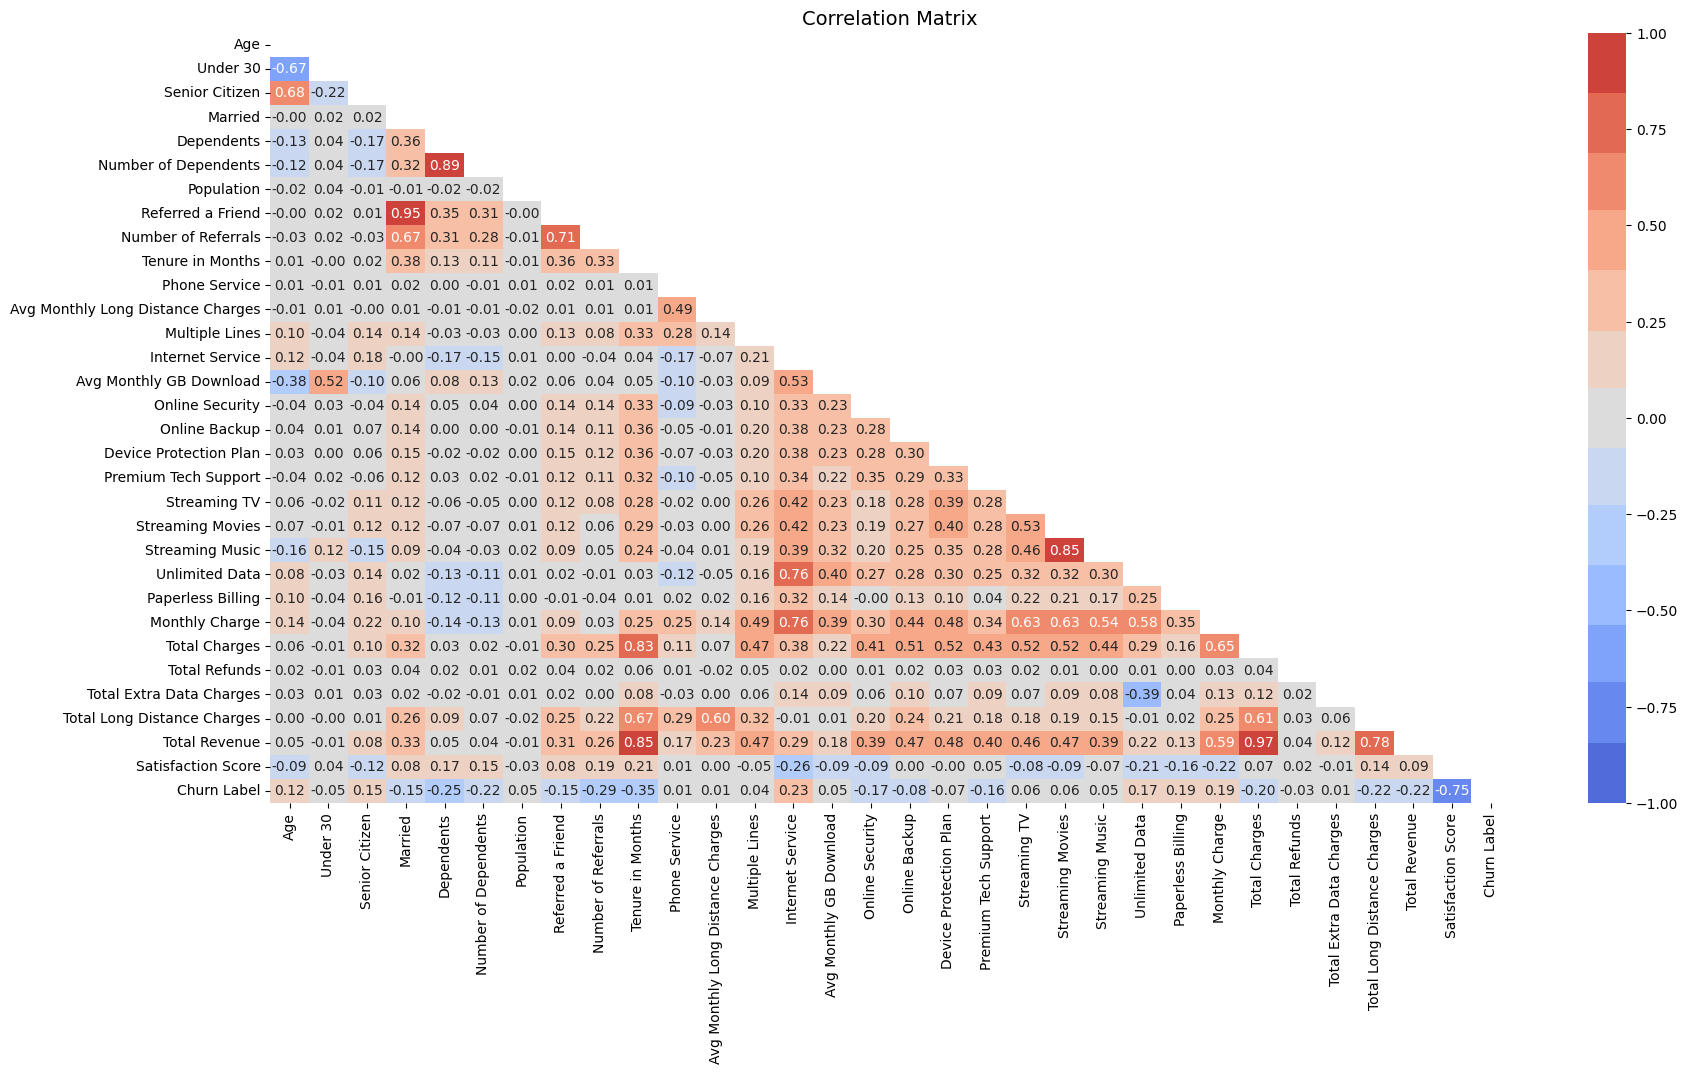

In [ ]:
def print_corr_matrix(df):
  df_s = df
  # compute the correlation matrix
  cm = df_s.corr(method='pearson', min_periods=1, numeric_only=True).round(2)
  mask = np.triu(np.ones_like(cm, dtype=bool))
  # correlation matrix using a heatmap
  fig, ax = plt.subplots(figsize=(20, 10))
  heat_map = sns.heatmap(cm,
                        annot = True,
                        cmap = sns.color_palette("coolwarm", 13),
                        vmax=1, vmin=-1, center=0,
                        fmt=".2f",
                        mask=mask
      )
  #modify individual font size of elements
  plt.title('Correlation Matrix', fontsize = 14)
  plt.tick_params(axis='both', which='major', labelsize=10)

  plt.show()

print_corr_matrix(df_s)

## Pair Plot of the Data

In [ ]:
def print_pair_plot(df):
  df_s = df
  #create pair plot
  #fig, ax = plt.subplots(figsize=(15, 10))
  p_plot = sns.pairplot(df_s, diag_kind = 'kde')
  #save the image
  plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')

  #modify individual font size of elements
  #plt.title('Pair Plot', fontsize = 28)
  #plt.tick_params(axis='both', which='major', labelsize=14)

  #plt.show()

#print_pair_plot(df_s)

## Feature Importance

## Summary of Exploratory Data Analsis

### Summary

### Conclusions

# Modeling

## Model Overview (Not Used in Class)

## Review of Colinearity

## Feature Engineering

## Create Features and Target Dataset

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

y = df_s.copy()['Churn Label']
X = df_s.copy().drop(['Churn Label'], axis=1)

#split the data to train and test datasets such that the test dataset is 20% of original data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, shuffle = True, random_state = 27)
# shuffle = True # Reomved as it is not specified

# print length of X_train and X_test
print('Length of Train: ', len(x_train))
print('Length of Test: ', len(x_test))
print('Percent for Testing: ', round(len(x_test)/len(X),2))


Length of Train:  5634
Length of Test:  1409
Percent for Testing:  0.2


## Model Creation

### Random Forest Basic Model

In [ ]:
x_train_dummies = pd.get_dummies(x_train)
x_test_dummies = pd.get_dummies(x_test)

x_train_dummies.head()

,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Gender_Female,Gender_Male,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
6334,44,False,False,True,True,2,23996,True,6,61,True,25.40,False,False,0,False,False,False,False,False,False,False,False,False,19.75,1311.60,0.0,0.0,1549.40,2861.00,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
4269,21,True,False,True,True,1,7936,True,8,61,True,42.11,False,False,0,False,False,False,False,False,False,False,False,False,19.10,1143.80,0.0,0.0,2568.71,3712.51,4,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4155,25,True,False,True,True,3,25566,True,1,72,True,20.79,True,True,59,True,True,False,True,False,True,True,True,True,97.75,6991.60,0.0,0.0,1496.88,8488.48,3,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1108,80,False,True,True,False,0,32562,True,3,3,True,39.51,False,True,17,False,True,False,False,False,False,False,False,True,74.60,239.05,0.0,30.0,118.53,387.58,5,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
1435,19,True,False,False,False,0,42832,False,0,4,True,41.12,False,True,42,False,False,False,False,False,False,True,False,False,70.40,281.00,0.0,70.0,164.48,515.48,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_state = 27
bootstrap = True     # True, False
verbose = 0
criterion = 'gini'   #'gini', 'entropy', 'log_loss'
n_estimators = 100   # 10 - 1000
max_depth = 5        # 2,4,6,8,10,12,14,16,18,20
min_samples_leaf = 1 #2,4,6,8,10

# Create the classifier
clf = RandomForestClassifier(random_state = 27,
                             bootstrap = True,
                             verbose = 0,
                             criterion = criterion,
                             n_estimators = n_estimators,
                             max_depth = max_depth,
                             min_samples_leaf = min_samples_leaf
                             )

clf.fit(x_train_dummies, y_train)

clf_score = clf.score(x_test_dummies, y_test)

print(clf_score)

0.9531582682753726


In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

feature_names = x_train_dummies.columns

import time

import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


In [ ]:
forest_importances.nlargest(n=15, keep='first')

#.nlargest(n=15, keep='first')

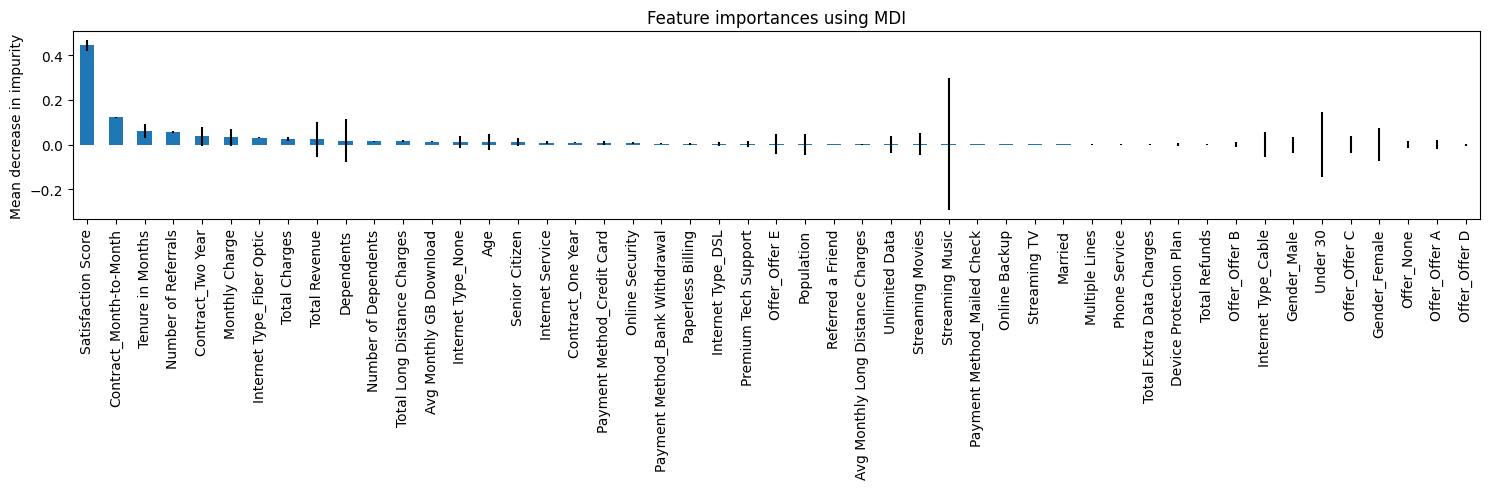

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
forest_importances = forest_importances.nlargest(n=15, keep='first')
frame = {'Feature' : forest_importances.index,
         'Importance' : forest_importances}
fi_df = pd.DataFrame(frame).reset_index(drop=True)

print(fi_df)

                        Feature  Importance
0            Satisfaction Score    0.445131
1       Contract_Month-to-Month    0.121849
2              Tenure in Months    0.061498
3           Number of Referrals    0.055398
4             Contract_Two Year    0.037047
5                Monthly Charge    0.032572
6     Internet Type_Fiber Optic    0.031596
7                 Total Charges    0.024122
8                 Total Revenue    0.023920
9                    Dependents    0.017816
10         Number of Dependents    0.014875
11  Total Long Distance Charges    0.014765
12      Avg Monthly GB Download    0.013186
13           Internet Type_None    0.012709
14                          Age    0.011860


In [ ]:
#Grid Search

from sklearn.model_selection import cross_val_score, GridSearchCV
grid=None # ToDo: replace it to proper GridSearchCV object and run the grid search with cross validation

num_list = []
for i in np.linspace(-5, 5, num=11):
    num_list.append(pow(2,i))
print(num_list)


# Create the classifier
clf = RandomForestClassifier(random_state = 27, verbose = 0, bootstrap = True)


# Create list of parameters to use in experiment
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'n_estimators': list(range(50, 2001, 20)),
              #'max_depth':num_list,
              #'min_samples_leaf':num_list
              }

grid = GridSearchCV(clf, parameters, cv = 5).fit(x_train_dummies,y_train)

print('Best Estimator: ', grid.best_estimator_)
print('Best Score: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

[0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]
Best Estimator:  RandomForestClassifier(random_state=27)
Best Score:  0.962903919773176
Best Parameters:  {'criterion': 'gini', 'n_estimators': 100}


In [ ]:
grid.best_estimator_.score(x_test_dummies,y_test)

0.9652235628105039

In [ ]:
param_1 = 'criterion'
param_2 = 'n_estimators'
scores = [x for x in grid.cv_results_["mean_test_score"]]
scores = np.array(scores).reshape(len(grid.param_grid[param_1]), len(grid.param_grid[param_2]))
print(scores)

[[0.96112914 0.96290392 0.96219407 0.96148406 0.96148438 0.96077437
  0.96095168 0.96095168 0.96112914 0.96059691 0.96095183 0.96112914
  0.9613066  0.96148406 0.96148406 0.96130676 0.96095168 0.96148422
  0.96148438 0.96148422]
 [0.96130707 0.96166168 0.96272646 0.96148406 0.96130629 0.96130629
  0.96166121 0.96183899 0.96166153 0.96148406 0.96148422 0.96166168
  0.96166168 0.9613066  0.9613066  0.9613066  0.96112914 0.96112914
  0.9613066  0.96166153]
 [0.96130707 0.96166168 0.96272646 0.96148406 0.96130629 0.96130629
  0.96166121 0.96183899 0.96166153 0.96148406 0.96148422 0.96166168
  0.96166168 0.9613066  0.9613066  0.9613066  0.96112914 0.96112914
  0.9613066  0.96166153]]


In [ ]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


def plotSearchGrid(grid, param_1, param_2):

    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid[param_1]), len(grid.param_grid[param_2]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel(param_2)
    plt.ylabel(param_1)
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid[param_2])), grid.param_grid[param_2], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid[param_1])), grid.param_grid[param_1])
    plt.title('Validation Accuracy')
    plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")

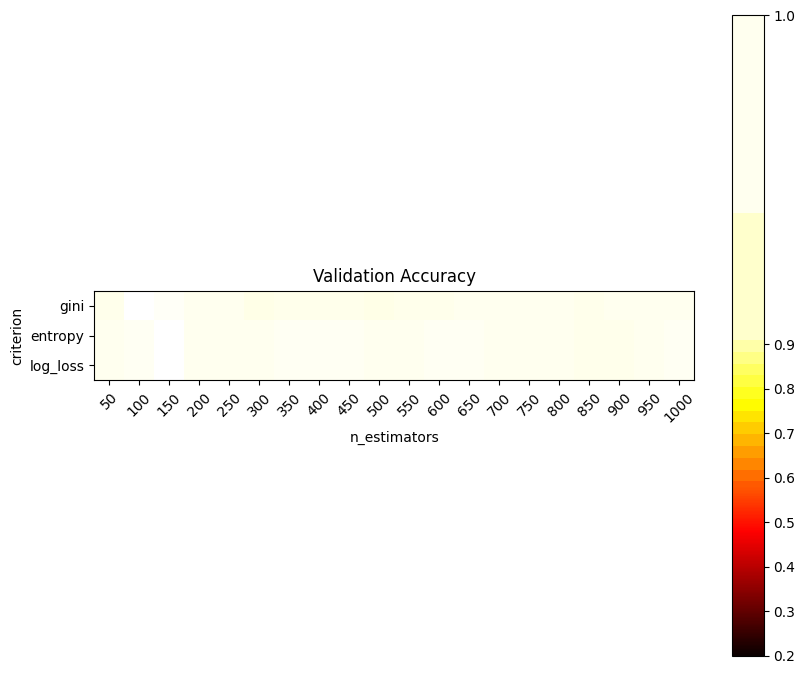

In [ ]:
plotSearchGrid(grid = grid, param_1 = 'criterion', param_2 = 'n_estimators')

In [ ]:
#Grid Search

from sklearn.model_selection import cross_val_score, GridSearchCV
grid=None # ToDo: replace it to proper GridSearchCV object and run the grid search with cross validation

num_list = []
for i in list(range(0, 8)):
    num_list.append(pow(2,i))
print(num_list)


# Create the classifier
clf = RandomForestClassifier(random_state = 27, verbose = 0, bootstrap = True, criterion = 'gini', n_estimators = 100)


# Create list of parameters to use in experiment
parameters = {'max_depth':num_list,
              'min_samples_leaf':num_list
              }

grid = GridSearchCV(clf, parameters, cv = 5).fit(x_train_dummies,y_train)

print('Best Estimator: ', grid.best_estimator_)
print('Best Score: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

[1, 2, 4, 8, 16, 32, 64]
Best Estimator:  RandomForestClassifier(max_depth=32, random_state=27)
Best Score:  0.962903919773176
Best Parameters:  {'max_depth': 32, 'min_samples_leaf': 1}


In [ ]:
grid.best_estimator_.score(x_test_dummies,y_test)

0.9652235628105039

In [ ]:
param_1 = 'max_depth'
param_2 = 'min_samples_leaf'
scores = [x for x in grid.cv_results_["mean_test_score"]]
scores = np.array(scores).reshape(len(grid.param_grid[param_1]), len(grid.param_grid[param_2]))
print(scores)

[[0.73464675 0.73464675 0.73464675 0.73464675 0.73464675 0.73464675
  0.73464675]
 [0.88711397 0.88711397 0.88711397 0.88711397 0.88711397 0.88640412
  0.88551681]
 [0.94337976 0.94302483 0.94213721 0.94196022 0.94036211 0.93681271
  0.92864881]
 [0.95793482 0.95953182 0.95864467 0.95828943 0.95740212 0.94870536
  0.93716811]
 [0.96183978 0.95899865 0.95899928 0.95811212 0.95811228 0.95047951
  0.93841034]
 [0.96290392 0.96006405 0.95970913 0.95846705 0.95811228 0.95047951
  0.93841034]
 [0.96290392 0.96006405 0.95970913 0.95846705 0.95811228 0.95047951
  0.93841034]]


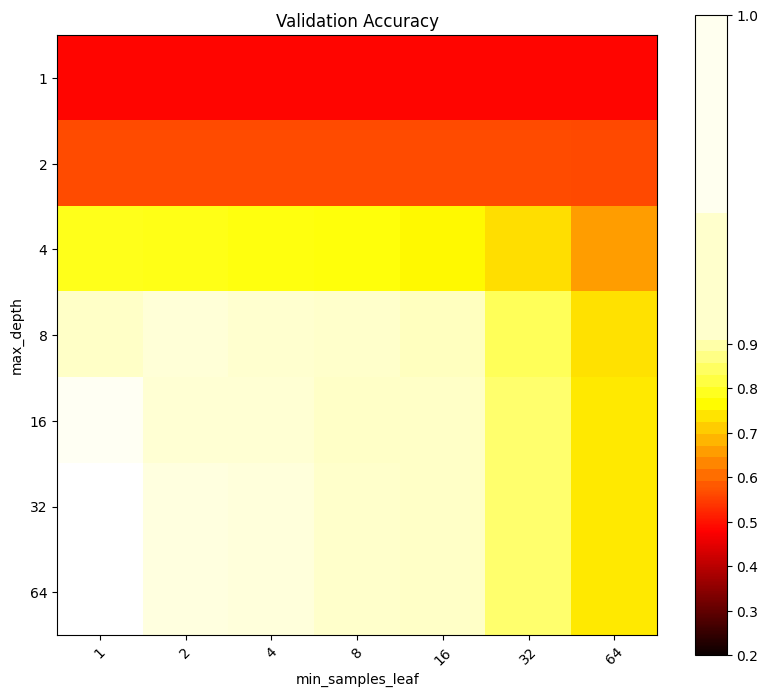

In [ ]:
plotSearchGrid(grid = grid, param_1 = 'max_depth', param_2 = 'min_samples_leaf')

## Hyper Parameter Tuning

# Results and Analysis

## Base Model Performance

## Iterative Model Improvements

## Final Model Performance

# Conclusion

## Learning and Takeaways

## Issues or Flaws in the Approach

## Suggested Improvements

# References

## Useful Documentation
*   **sklearn.ensemble.GradientBoostingClassifier** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
*   **XGBoost Python Package: Python API Reference** https://xgboost.readthedocs.io/en/stable/python/python_api.html
*   **Kaggle: Using XGBoost with Scikit-learn** https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn
*   **SciKit-Learn: 1.13. Feature Selection** https://scikit-learn.org/stable/modules/feature_selection.html
*   **SciKit-Learn: 3.3. Metrics and scoring: quantifying the quality of predictions** https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
*   **ProductPlan: Churn** https://www.productplan.com/glossary/churn/


# References
- **Customer Attrition**
 - **Type:** Background Document
 - **Link:** https://en.wikipedia.org/wiki/Customer_attrition
  - **Purpose:** Support details on project focus
  - **Purpose Description:** Additional details and research on project focus to establish relevancy an why a model should be created.

* **Telco customer churn (11.1.3+)**
 * **Type:** Reference Document
 * **Link:** https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
  * **Purpose:** Source of Data Dictionary
  * **Purpose Description:** Documentation created by the IBM Samples Team that outlines the collection of sample data an assets as well as defines data fields in a data dictionary

* **Kaggle: Telco customer churn (11.1.3+)**
 * **Type:** Kaggle Dataset
 * **Link:** https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113
  * **Purpose:** Dataset Source
  * **Purpose Description:** Public Kaggle Datasource where the IMB CUstomer Churn data files are shared as separate table aligned to original data model. Secondary source of a data dictionary for files

* **Predict Customer Churn using Watson Machine Learning and Jupyter Notebooks on Cloud Pak for Data**
 * **Type:** Github Repository
 * **Link:** https://github.com/IBM/telco-customer-churn-on-icp4d#3-upload-the-dataset
  * **Purpose:** General Reference
  * **Purpose Description:** General reference of an application an analysis of curn data files from IBM.  Consolidated data file (looking for split data files to use in data prep).

* **A Survey on Machine Learning Methods for Churn Prediction**
 * **Type:** Academic Paper
 * **Link:** https://hal.science/hal-03824873
  * **Purpose:** General Reference
  * **Purpose Description:** Detailed academic paper on Churn Prediction. Provides a table of many curn data source that could potentially be used for general model analysis and application.

* **Kaggle: Telco customer churn: IBM dataset**
 * **Type:** Kaggle Dataset
 * **Link:** https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
  * **Purpose:** Data Source (Alternate)
  * **Purpose Description:** Alternae source of data from Kaggle.  This data is consolidated into a single file and is not used, as I would like to start with the raw data files as far upstream as possible.

* **Maven: Telecom Customer Churn**
 * **Type:** Maven Dataset
 * **Link:** https://www.mavenanalytics.io/data-playground?pageSize=20
  * **Purpose:** Data Source (Alternate)
  * **Purpose Description:** Well curated Telco Customer Churn dataset sourced from the IBM Cognos Analytics source.  Likely more refined as a starting point than I am looking to use for this analysis.

* **Analyzing Customer Churn in Telecom**
 * **Type:** Blog Post
 * **Link:** https://medium.com/@odmirajkar/analyzing-customer-churn-in-telecom-f928c8119244
  * **Purpose:** General Reference
  * **Purpose Description:** Lightweight blog post on analyzing customer curn in Telecom. Establish foundation and commonality of this type of analysis occuring as a demonstration and project.

* **Customer Churn Prediction**
 * **Type:** Complete Data Science Notebook
 * **Link:** https://deepnote.com/@flsbustamante/customer-churn-prediction-8eac729e-7ba2-4fb2-9ce0-7018e476d572
  * **Purpose:** General Reference
  * **Purpose Description:** Much more complex analysis of customer churn complete by a fellow data scientist. Good references to other materials to support research and references. Interesting outline to content structuring and section breakouts.

* **End-to-end machine learning project: Telco customer churn**
 * **Type:** Complete Data Science Notebook
 * **Link:** https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d
  * **Purpose:** General Reference
  * **Purpose Description:** Much more complex analysis of customer churn complete by a fellow data scientist. Good references to other materials to support research and references. Interesting outline to content structuring and section breakouts.